# Question 7(a) Newton-Raphson

82.38788401181738
6.638043654338139
0.016296664844639652
0.0006978262959219661
======================Question 7(a) Newton-Raphson======================
alpha convergent values =  5.893069238310392
beta convergent values =  1.2107255888563406
Q(alpha ,beta) =  0.6354023093011293


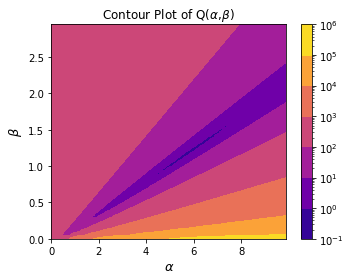

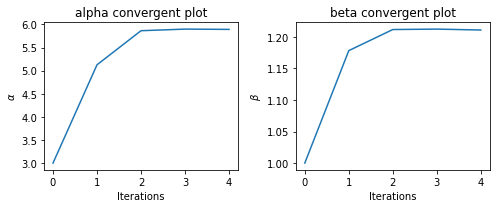

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom
from matplotlib import colors


x_data = [ 9.1, 4.41, 18.99, 13.73, 9.1, 30.89, 19.17, 8.64, 8.67, 15.62,
        14.68 , 11.09 , 11.53, 2.28 , 3.64, 5.5 , 0.73, 12.39, 25.7 , 6.31 , 
        12.43 , 4.81, 9.28 , 4.82 , 3.85 , 6.88, 12.48, 11.66, 8.06, 5.97 ] 

y_data = [4.49, 4.12, 4.84, 4.93, 4.24, 4.9, 4.81, 4.57, 4.37, 4.61, 4.29, 
            4.55, 4.35, 3.56, 3.76, 4.18, 2.25, 4.46, 4.63, 4.27, 4.61, 4.11, 
            4.74, 3.98, 3.96, 4.42, 4.78, 4.55, 4.35, 4.25]

def Q_func(alpha,beta,x_data,y_data):
    result=[]
    for i,x in enumerate(x_data):
        y = y_data[i]
        least_square = alpha*x/(1+beta*x)
        result.append((y- least_square)**2)
    return sum(result)


# Score function 
def beta_score(alpha,beta,x_data,y_data):
    beta_sc=[]
    for i, x in enumerate(x_data): 
        y = y_data[i]
        tmp = 2*(-x/(1+beta*x))*(y-alpha*x/(1+beta*x))
        beta_sc.append(tmp)
    return sum(beta_sc)

def alpha_score(alpha,beta,x_data,y_data):
    alpha_sc=[]
    for i, x in enumerate(x_data): 
        y = y_data[i]
        tmp = 2*(alpha*x**2/(alpha+beta*x)**2)*(y-alpha*x/(1+beta*x))
        alpha_sc.append(tmp)
    return sum(alpha_sc)

alpha_range=np.arange(0,10,0.1)
beta_range=np.arange(0,3,0.05)
alpha, beta = np.meshgrid(alpha_range, beta_range)

plt.figure(figsize=(5, 4))
result =Q_func(alpha,beta,x_data,y_data)
cp = plt.contourf(alpha, beta, result,cmap=plt.cm.plasma,norm=colors.LogNorm())
plt.colorbar(cp)

plt.xlabel(r'$\alpha$',fontsize=13)
plt.ylabel(r'$\beta$',fontsize=13)
plt.title(r'Contour Plot of Q($\alpha$,$\beta$)')
plt.tight_layout()



# # Question 7(a) Newton-Raphson
def grad_h(alpha,beta,x_data,y_data):
    theta1 = alpha_score(alpha,beta,x_data,y_data)
    theta2 = beta_score(alpha,beta,x_data,y_data)
    return [[theta2], [theta1]]


def hessian_h(alpha,beta,x_data,y_data):
    tmp1=[]; tmp2=[];tmp4=[];
    for i, x in enumerate(x_data):
        y = y_data[i]
        tmp1.append(2*(x/(1+beta*x))**2)
        tmp2.append(2*x**2*(-2*alpha*x+y+beta*x*y)/(1+beta*x)**3)
        tmp4.append(2*x**3*(3*alpha*x-2*(y+beta*x*y))/(1+beta*x)**3)
    H11 =  sum(tmp1)
    H12 =  sum(tmp2)
    H21 =  sum(tmp2)
    H22 =  sum(tmp4)
    return [[H11, H12],[H21,H22]]


alpha_0,beta_0= 3,1# initial values
theta = {'alpha': [alpha_0], 'beta':[beta_0]}
n_itr= 20
for i in range(n_itr):
    curr_alpha = theta['alpha'][i]
    curr_beta = theta['beta'][i]
    theta_k =[[curr_alpha],[curr_beta]]
    X = hessian_h(curr_alpha,curr_beta,x_data,y_data)
    X = np.linalg.inv(X)
    Y = grad_h(curr_alpha,curr_beta,x_data,y_data)
    Sk = [[sum(a*b for a,b in zip(X_row,Y_col)) for Y_col in zip(*Y)] for X_row in X]
    theta_update = np.subtract(theta_k, Sk)
    theta['alpha'].append(theta_update[0][0])
    theta['beta'].append(theta_update[1][0])
    value_now = Q_func(curr_alpha,curr_beta,x_data,y_data)
    value_before = Q_func(theta_update[0][0],theta_update[1][0],x_data,y_data)
    print(np.abs(value_before - value_now))
    if np.abs(value_before - value_now)<0.001:
        break

print('======================Question 7(a) Newton-Raphson======================')
print('alpha convergent values = ',theta['alpha'][-1])
print('beta convergent values = ',theta['beta'][-1])
print('Q(alpha ,beta) = ',Q_func(theta['alpha'][-1],theta['beta'][-1],x_data,y_data))

plt.figure(figsize =(7,3))
plt.subplot(1,2,1)
plt.plot(theta['alpha'])
plt.title('alpha convergent plot')
plt.ylabel(r'$\alpha$')
plt.xlabel('Iterations')
plt.subplot(1,2,2)
plt.plot(theta['beta'])
plt.ylabel(r'$\beta$')
plt.xlabel('Iterations')
plt.title('beta convergent plot')
plt.tight_layout()
plt.show()



# Question 7(d) genetic algorithm

In [4]:
# genetic algorithm search for continuous function optimization
from numpy.random import randint
from numpy.random import rand
import numpy as np



x_data = [ 9.1, 4.41, 18.99, 13.73, 9.1, 30.89, 19.17, 8.64, 8.67, 15.62,
        14.68 , 11.09 , 11.53, 2.28 , 3.64, 5.5 , 0.73, 12.39, 25.7 , 6.31 , 
        12.43 , 4.81, 9.28 , 4.82 , 3.85 , 6.88, 12.48, 11.66, 8.06, 5.97 ] 

y_data = [4.49, 4.12, 4.84, 4.93, 4.24, 4.9, 4.81, 4.57, 4.37, 4.61, 4.29, 
            4.55, 4.35, 3.56, 3.76, 4.18, 2.25, 4.46, 4.63, 4.27, 4.61, 4.11, 
            4.74, 3.98, 3.96, 4.42, 4.78, 4.55, 4.35, 4.25]

def Q_func(theta):
    alpha = theta[0]
    beta  = theta[1]
    x_data = [ 9.1, 4.41, 18.99, 13.73, 9.1, 30.89, 19.17, 8.64, 8.67, 15.62,
    14.68 , 11.09 , 11.53, 2.28 , 3.64, 5.5 , 0.73, 12.39, 25.7 , 6.31 , 
    12.43 , 4.81, 9.28 , 4.82 , 3.85 , 6.88, 12.48, 11.66, 8.06, 5.97 ] 

    y_data = [4.49, 4.12, 4.84, 4.93, 4.24, 4.9, 4.81, 4.57, 4.37, 4.61, 4.29, 
                4.55, 4.35, 3.56, 3.76, 4.18, 2.25, 4.46, 4.63, 4.27, 4.61, 4.11, 
                4.74, 3.98, 3.96, 4.42, 4.78, 4.55, 4.35, 4.25]			
    result=[]
    for i,x in enumerate(x_data):
        y = y_data[i]
        least_square = alpha*x/(1+beta*x)
        result.append((y- least_square)**2)
    return sum(result)

# selection
def selection(pop, scores):
    selection_ix = randint(len(pop))
    for ix in randint(0, len(pop), 2):
        if scores[ix] < scores[selection_ix]:
            selection_ix = ix
    return pop[selection_ix]

# crossover two parents to create two offspring
def crossover(p1, p2, r_cross):
    c1, c2 = p1.copy(), p2.copy()
    if rand() < r_cross:
        pt = randint(1, len(p1)-2)
        c1 = p1[:pt] + p2[pt:]
        c2 = p2[:pt] + p1[pt:]
    return [c1, c2]

# mutation 
def mutation(bitstring, r_mut):
    for i in range(len(bitstring)):
        if rand() < r_mut:
            bitstring[i] = 1 - bitstring[i] # flip the bit

# convert bitstring to numbers
def decode(bounds, n_bits, bitstring):
    decoded = list()
    largest = 2**n_bits
    for i in range(len(bounds)):
        start, end = i * n_bits, (i * n_bits)+n_bits
        substring = bitstring[start:end]
        chars = ''.join([str(s) for s in substring])
        integer = int(chars, 2)
        value = bounds[i][0] + (integer/largest) * (bounds[i][1] - bounds[i][0])
        decoded.append(value)
    return decoded

# genetic algorithm
def genetic_algorithm(likelihood_fun, bounds, n_bits, n_iter, n_pop, r_cross, r_mut):
    pop = [randint(0, 2, n_bits*len(bounds)).tolist() for _ in range(n_pop)]
    best, best_eval = 0, likelihood_fun(decode(bounds, n_bits, pop[0]))
    for gen in range(n_iter):
        decoded = [decode(bounds, n_bits, p) for p in pop]
        scores = [likelihood_fun(d) for d in decoded]
        for i in range(n_pop):
            if scores[i] < best_eval:
                best, best_eval = pop[i], scores[i]
                print(">%d, new best f(%s) = %.3f" % (gen,  pop[i], scores[i]))
        selected = [selection(pop, scores) for _ in range(n_pop)]
        offspring = list()
        for i in range(0, n_pop, 2):
            p1, p2 = selected[i], selected[i+1]
            for c in crossover(p1, p2, r_cross):
                mutation(c, r_mut)
                offspring.append(c)
        pop = offspring
    return [best, best_eval]

# define range for input

bounds = [[4, 7],[.5,2]]
n_pop = 20    # define the population size
n_iter = 200   # define the total iterations
n_bits = 16    # bits per variable
r_cross = 0.1  # crossover rate
r_mut = 1.0 / (float(n_bits) * len(bounds))   # mutation rate

best, score = genetic_algorithm(Q_func, bounds, n_bits, n_iter, n_pop, r_cross, r_mut)
print('Done!')
decoded = decode(bounds, n_bits, best)
print('f(%s) = %f' % (decoded, score)) 




>0, new best f([0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1]) = 3.926
>0, new best f([0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1]) = 2.305
>0, new best f([1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1]) = 0.849
>0, new best f([0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0]) = 0.810
>1, new best f([1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0]) = 0.779
>2, new best f([1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1]) = 0.683
>4, new best f([0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0]) = 0.677
>4, new best f([0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0]) = 0.634
>5, new best f([0, 0, 1, 1, 1, 1